## Neural Network classification with pytorch
Classification is a problem of predicting the class or category of a given object.


## Make classification data and get it ready

In [ ]:
import sklearn
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000

# Create circles
# X = features, y = labels

X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [ ]:
len(X),len(y)

(1000, 1000)

In [ ]:
print(X[:5])
print(y[:5])

[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
[1 1 1 1 0]


In [ ]:
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [ ]:
# Make a dataframe
import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0],
                        "X2": X[:, 1],
                        "label": y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


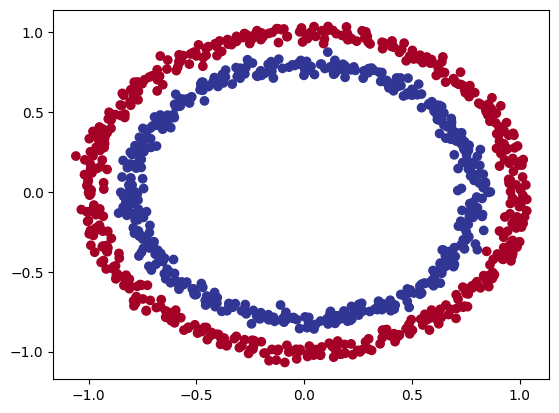

In [ ]:
# Visualize
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu)
#

Note: The data we are working with is often refrerred to as a toy dataset, a dataset that is small enough to experiment but still sizeable enough to practice the fundamentals.

### Check input and Output shapes

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
# View the first example of features and labels
X_sample = X[0]
y_sample = y[0]
print(f"Sample input features: {X_sample}")
print(f"Sample label: {y_sample}")


Sample input features: [0.75424625 0.23148074]
Sample label: 1


### Turn data into tensor and create train and test splits

In [ ]:
import torch


# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# Check data type
print(X[:5], X.dtype)
print(y[:5], y.dtype)

tensor([[ 0.7542,  0.2315],
        [-0.7562,  0.1533],
        [-0.8154,  0.1733],
        [-0.3937,  0.6929],
        [ 0.4422, -0.8967]]) torch.float32
tensor([1., 1., 1., 1., 0.]) torch.float32


In [ ]:
type(X), type(y)

(torch.Tensor, torch.Tensor)

In [ ]:
# split data into training and test data sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,# 20% of data will be test and 80% will be train data
                                                    random_state=42)

In [ ]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [ ]:
n_samples

1000

## Buidling a model
## Let's build a model to classify our blue and red dots
* Setup device agoistic code so our code will run on aan accelerator GPU if there is one
* Construct a model by
* define a loss function and optimizer
* Create a training and test loop


In [ ]:
# Import Pytorch and nn
import torch
from torch import nn

# Make device agonstic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
X_train

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.5578, -0.5709]])

Now we've setup device agonistic code, let's construct a model by subclassing nn.Module.

* Subclasses 'nn.module' (almost all models in pytorch subclass 'nn.module')
* Create 2 nn.linear () layer that are capable of handling the shape of our data
* Defines a forward () method that outlines the forward pass ( or forward computation) of the model
* Instatiate an instance of our model class and send it to the target device

In [ ]:
# Construct a model that subclases nn.module
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()

        # Ceate 2 nn.Linear layers capable of handling the shapes of our data
        self.layer_1 = nn.Linear(in_features=2, out_features=5) # takes in 2 features and upscales to 5 features
        self.layer_2 = nn.Linear(in_features=5, out_features=1) # takes in 5 features and outputs 1 feature

        #self.two_linear_layers = nn.Sequential(
            #nn.Linear(in_features=2, out_features=5),
            #nn.Linear(in_features=5, out_features=1)
        #)


        # Define a forward method that outlines the forward pass (or forward computation) of the model
        def forward(self, x):
            return self.layer_2(self.layer_1(x)) # x-> layer_1 -> layer_2-> output

 # Instantiate an instance of our model class and send it to the target device
model_0 = CircleModelV0().to(device)
model_0


CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
# Lets replicate the model above using nn.sequential()
model_0 = nn.Sequential(
    nn.Linear(in_features=2,
              out_features=5),
    nn.Linear(in_features=5,
              out_features=1)
).to(device)
model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.4831, -0.0600],
                      [-0.2006,  0.6667],
                      [ 0.3944, -0.2382],
                      [-0.0407, -0.1931],
                      [ 0.0470,  0.0581]])),
             ('0.bias', tensor([-0.0335,  0.5925,  0.6019,  0.3998, -0.2371])),
             ('1.weight',
              tensor([[-0.3836,  0.1528, -0.3547,  0.2413, -0.4284]])),
             ('1.bias', tensor([0.3947]))])

In [ ]:
# Make predictions
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))
print(f"length of predictions: {len(untrained_preds)}, shape of predictions: {untrained_preds.shape}")
print(f"length of test samples: {len(X_test)}, shape of test labels: {X_test.shape}")
print(f"\nFirst 10 predictions:\n{torch.round(untrained_preds[:10])}")
print(f"\nFirst 10 test labels:\n{y_test[:10]}")


length of predictions: 200, shape of predictions: torch.Size([200, 1])
length of test samples: 200, shape of test labels: torch.Size([200, 2])

First 10 predictions:
tensor([[1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.]])

First 10 test labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [ ]:
y_test[:10], X_test[:10]

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]),
 tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664],
         [ 0.4024, -0.7438],
         [ 0.6323, -0.5711],
         [ 0.8561,  0.5499],
         [ 1.0034,  0.1903],
         [-0.7489, -0.2951],
         [ 0.0538,  0.9739]]))

### Setup loss function and optimizer
Which loss function or optimizer should you use
Again this depends on the problem you are trying to solve.
For example for regression you might want to MAE or MSE
for classification you might want binary cross entropy or categorical cross entropy and the loss function measures how wrong your model predictions are
and for optimizers, two of the most common and useful ae SGD and ADAM, however Pytorch has many build in options
* For the loss function we are going to use torch.nn.BECwithlogitloss

In [ ]:
# setup the loss fucntion
loss_fn = nn.BCEWithLogitsLoss()

# setup the optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

In [ ]:
# Calculate accuracy out of 100 examples, what percentage does our model get right
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) *100
    return acc

# Train model
to train our model we are going to need to build a training loop with the following step_size_to_bound
* Forward pass
* Calculate the loss
* Optimizer zero grad
* Loss backward
* Optimizer step

### Going from raw logits--> prediction probabilities---> prediction lables
our model outputs are going to be raw logits.


In [ ]:
# view the firt 5 outputs of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device)) # forward pass

y_logits[:5]

tensor([[0.5825],
        [0.6148],
        [0.4499],
        [0.6203],
        [0.3740]])

In [ ]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [ ]:
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs[:5]

tensor([[0.6416],
        [0.6490],
        [0.6106],
        [0.6503],
        [0.5924]])

In [ ]:
torch.round(y_pred_probs)[:5]

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.]])

In [ ]:
# Find the predicted labels
y_preds = torch.round(y_pred_probs)
y_preds

# In full
y_preds_labels = torch.round(torch.sigmoid(model_0(X_test.to(device)))) # removed [:5]

y_preds

# check for quality
print(torch.eq(y_preds.squeeze(), y_preds_labels.squeeze()))

# Get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, Tr

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1.])

In [ ]:
### Building a training and testing loop
torch.manual_seed(42)

# Set the number of epochs
epochs = 1000

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)


# Define loss function
loss_fn = nn.BCEWithLogitsLoss() # this is for binary classification

# Define optimizer
optimizer = torch.optim.SGD(model_0.parameters(), lr=0.001) # create your optimizer instance here

for epoch in range(epochs):
    ### Training
    model_0.train()

    # 1. Forward pass
    y_logits = model_0(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))

    # 2. Calculate the loss

    loss = loss_fn(y_logits,
                   y_train)
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step


    ### Testing
    model_0.eval()
    with torch.inference_mode():

        # 1. Forward pass
        test_logits = model_0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        # 2. Calculate the loss/accuracy
        test_loss = loss_fn(test_logits,
                            y_test)

        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)

        # Print out whats happening
        if epoch % 10 == 0:
            print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.72195, Accuracy: 50.00% | Test loss: 0.72669, Test acc: 50.00%
Epoch: 10 | Loss: 0.72195, Accuracy: 50.00% | Test loss: 0.72669, Test acc: 50.00%
Epoch: 20 | Loss: 0.72195, Accuracy: 50.00% | Test loss: 0.72669, Test acc: 50.00%
Epoch: 30 | Loss: 0.72195, Accuracy: 50.00% | Test loss: 0.72669, Test acc: 50.00%
Epoch: 40 | Loss: 0.72195, Accuracy: 50.00% | Test loss: 0.72669, Test acc: 50.00%
Epoch: 50 | Loss: 0.72195, Accuracy: 50.00% | Test loss: 0.72669, Test acc: 50.00%
Epoch: 60 | Loss: 0.72195, Accuracy: 50.00% | Test loss: 0.72669, Test acc: 50.00%
Epoch: 70 | Loss: 0.72195, Accuracy: 50.00% | Test loss: 0.72669, Test acc: 50.00%
Epoch: 80 | Loss: 0.72195, Accuracy: 50.00% | Test loss: 0.72669, Test acc: 50.00%
Epoch: 90 | Loss: 0.72195, Accuracy: 50.00% | Test loss: 0.72669, Test acc: 50.00%
Epoch: 100 | Loss: 0.72195, Accuracy: 50.00% | Test loss: 0.72669, Test acc: 50.00%
Epoch: 110 | Loss: 0.72195, Accuracy: 50.00% | Test loss: 0.72669, Test acc: 50.00%
Epo

In [ ]:
## Make predictions and evaluate the model
## import a function called
import requests
from pathlib import Path

## Download helper function from learn pytorch repo
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists


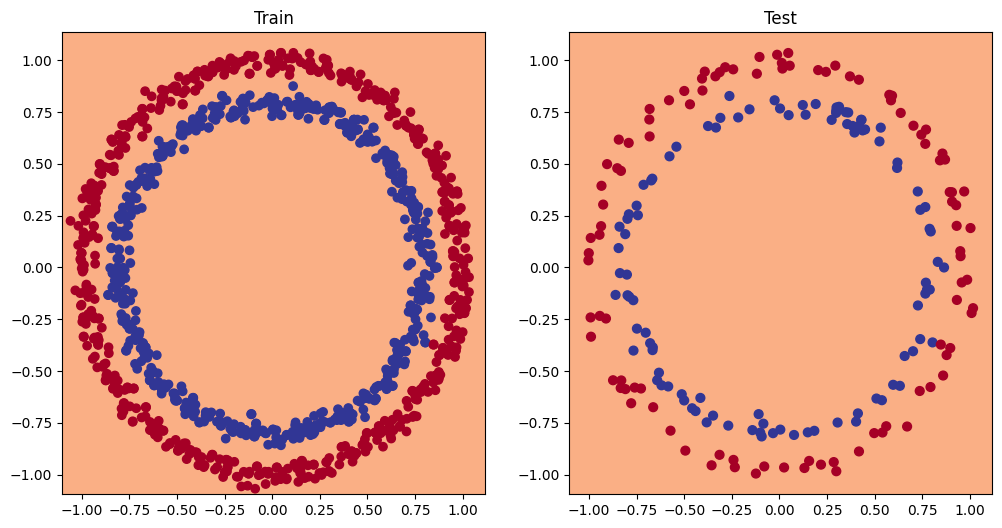

In [ ]:
## plot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1) # Changed the index to 1
plt.title("Train")

plot_decision_boundary(model_0, X_test, y_test)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)
#plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

## Improving a model
* Add more layers give the model more chances to learn about patterns in the data
* Add more hidden units- go from 5 hidden units to 10 hidden Unit
* Change the activation function
* Change the learning rate
* Change the optimizer

In [ ]:
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU()


    def forward(self, x):
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
# Create a loss function
loss_fn = nn.BCEWithLogitsLoss()

# Create an optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.01)
# Write a training and evaluation loop for model_1
torch.manual_seed(42)

# Set the number of epochs
epochs = 1000

#put the data on the target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    ### Training
    model_1.train()

    # 1. Forward pass
    y_logits = model_1(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))

    # 2. Calculate the loss
    loss = loss_fn(y_logits,
                   y_train)
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)




    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step


    ### Testing
    model_1.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_1(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        # 2. Calculate the loss/accuracy
        test_loss = loss_fn(test_logits,
                            y_test)
        test_acc = accuracy_fn(y_true=y_test,y_pred=test_pred)

        # Print out whats happening
        if epoch % 100 == 0:
            print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")




Epoch: 0 | Loss: 0.69295, Accuracy: 50.00% | Test loss: 0.69325, Test acc: 50.00%
Epoch: 100 | Loss: 0.69295, Accuracy: 50.00% | Test loss: 0.69325, Test acc: 50.00%
Epoch: 200 | Loss: 0.69295, Accuracy: 50.00% | Test loss: 0.69325, Test acc: 50.00%
Epoch: 300 | Loss: 0.69295, Accuracy: 50.00% | Test loss: 0.69325, Test acc: 50.00%
Epoch: 400 | Loss: 0.69295, Accuracy: 50.00% | Test loss: 0.69325, Test acc: 50.00%
Epoch: 500 | Loss: 0.69295, Accuracy: 50.00% | Test loss: 0.69325, Test acc: 50.00%
Epoch: 600 | Loss: 0.69295, Accuracy: 50.00% | Test loss: 0.69325, Test acc: 50.00%
Epoch: 700 | Loss: 0.69295, Accuracy: 50.00% | Test loss: 0.69325, Test acc: 50.00%
Epoch: 800 | Loss: 0.69295, Accuracy: 50.00% | Test loss: 0.69325, Test acc: 50.00%
Epoch: 900 | Loss: 0.69295, Accuracy: 50.00% | Test loss: 0.69325, Test acc: 50.00%


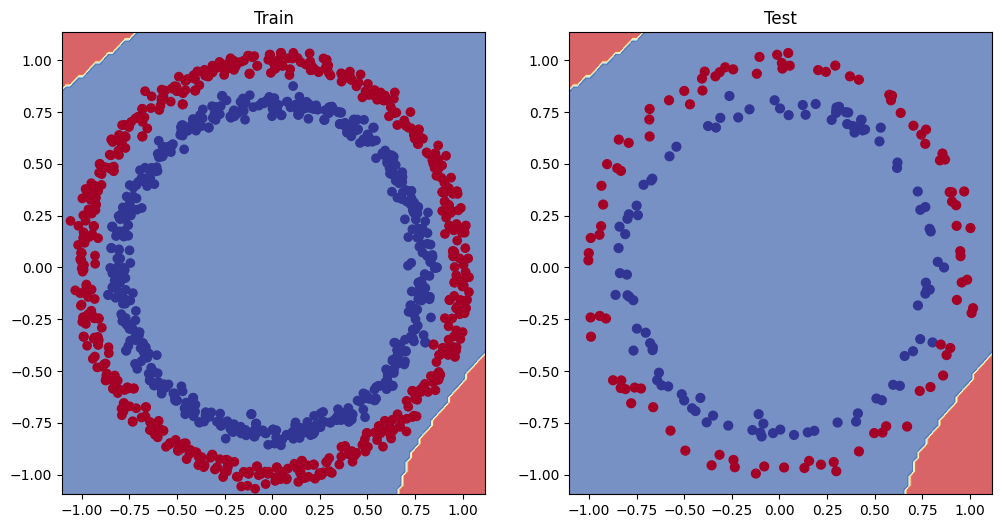

In [ ]:
## plot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1) # Changed the index to 1
plt.title("Train")

plot_decision_boundary(model_1, X_test, y_test)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)
#plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

### Preparing data to see if our model can fit a straight line
 Test a smaller problem

In [ ]:
# Create some data
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

# Create data
X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias

# check the data
X_regression[:10], y_regression[:10]

(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400],
         [0.0500],
         [0.0600],
         [0.0700],
         [0.0800],
         [0.0900]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280],
         [0.3350],
         [0.3420],
         [0.3490],
         [0.3560],
         [0.3630]]))

In [ ]:
# Create and Train and test splits
train_split = int(0.8 * len(X_regression))
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

# check the length of data
len(X_train_regression), len(y_train_regression), len(X_test_regression), len(y_test_regression)

(80, 80, 20, 20)

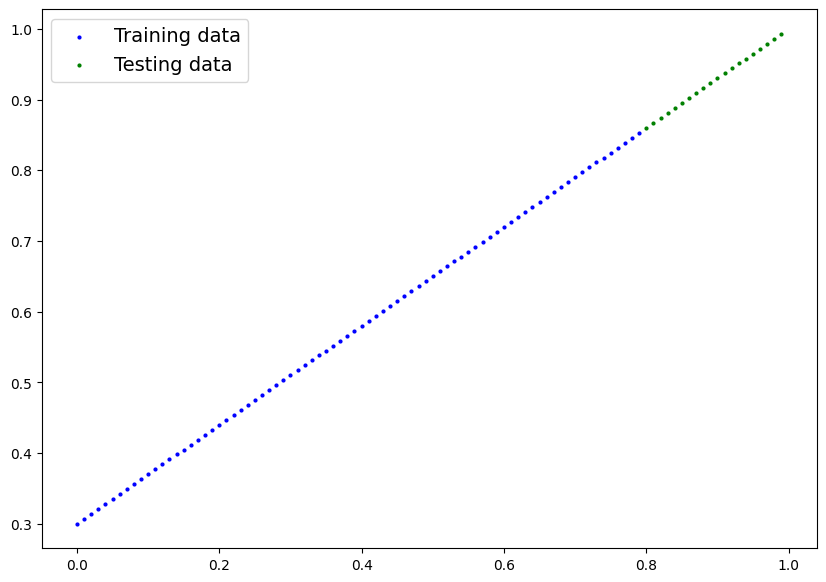

In [ ]:
plot_predictions(train_data=(X_train_regression),
                 train_labels= y_train_regression,
                 test_data=(X_test_regression),
                 test_labels= y_test_regression)


In [ ]:
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
### Adjusting model_1 to fit a straight line
X_train_regression[:10], y_train_regression[:10]

(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400],
         [0.0500],
         [0.0600],
         [0.0700],
         [0.0800],
         [0.0900]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280],
         [0.3350],
         [0.3420],
         [0.3490],
         [0.3560],
         [0.3630]]))

In [ ]:
# Same architecture as model_1 but using nn.sequential
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)


model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
# Loss and optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.01)

In [ ]:
# Train the model
torch.manual_seed(42)

# Set the number of epochs
epochs = 1000

# Put the data on the target device
X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

# Training
for epoch in range(epochs):
    y_pred = model_2(X_train_regression)

    # 2. Calculate the loss
    loss = loss_fn(y_pred,
                   y_train_regression)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    # Testing
    model_2.eval()
    with torch.inference_mode():
        test_pred = model_2(X_test_regression)
        test_loss = loss_fn(test_pred,
                            y_test_regression)

        # Print out whats happening
        if epoch % 100 == 0:
            print(f"Epoch: {epoch} | Loss: {loss:.5f} | Test loss: {test_loss:.5f}")



Epoch: 0 | Loss: 0.75986 | Test loss: 0.91103
Epoch: 100 | Loss: 0.02858 | Test loss: 0.00081
Epoch: 200 | Loss: 0.02533 | Test loss: 0.00209
Epoch: 300 | Loss: 0.02137 | Test loss: 0.00305
Epoch: 400 | Loss: 0.01964 | Test loss: 0.00341
Epoch: 500 | Loss: 0.01940 | Test loss: 0.00387
Epoch: 600 | Loss: 0.01903 | Test loss: 0.00379
Epoch: 700 | Loss: 0.01878 | Test loss: 0.00381
Epoch: 800 | Loss: 0.01840 | Test loss: 0.00329
Epoch: 900 | Loss: 0.01798 | Test loss: 0.00360


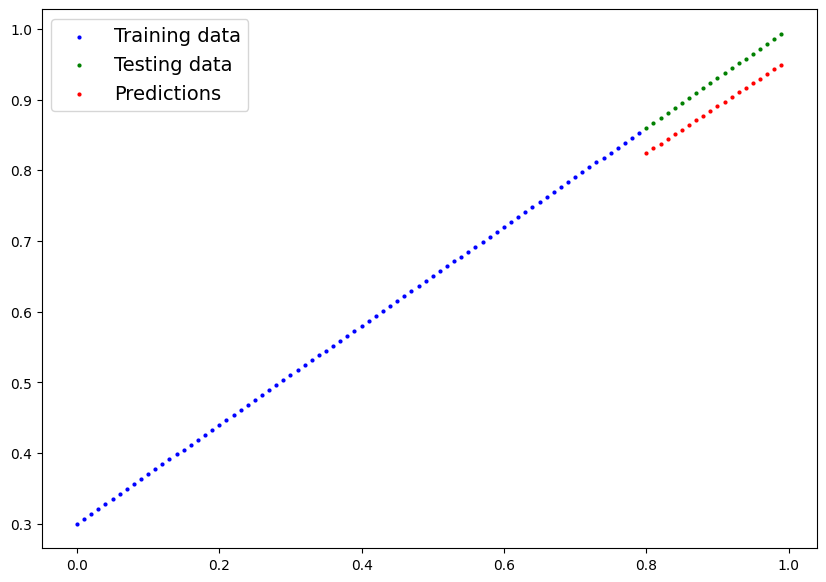

In [ ]:
# Predictions and turn on evaluation mode
model_2.eval()
with torch.inference_mode():
    y_preds = model_2(X_test_regression)

# Plot predictions and data
plot_predictions(train_data=X_train_regression,
                 train_labels=y_train_regression,
                 test_data=X_test_regression,
                 test_labels=y_test_regression,
                 predictions=y_preds)


## The missing piece Non Linearity


## Recreating non linear data red and blue circles

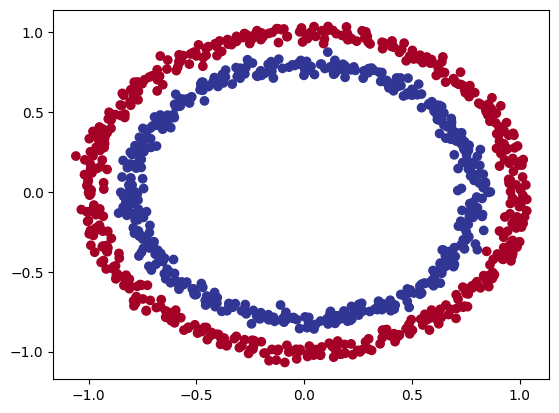

In [ ]:
# make and plot data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples,noise=0.03, random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [ ]:
# Covert data to tensors and then to train and test the data
import torch
from sklearn.model_selection import train_test_split

# Turn data into tensors
X = torch.from_numpy(X.numpy()).type(torch.float) # Convert X to a NumPy array first
y = torch.from_numpy(y.numpy()).type(torch.float) # Convert y to a NumPy array first


# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)
X_train[:5], y_train[:5]


AttributeError: 'numpy.ndarray' object has no attribute 'numpy'

In [ ]:
### Building a model with non linearity
from torch import nn
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU() # for non linear input

# Create a torch.device object
    def forward(self, x):
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))
model_3 = CircleModelV2().to(device) # remove .to(device)
model_3

In [ ]:
# Setup loss and optimiser
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(),
                            lr=0.1)

# Training a model with non linearity


In [ ]:
# Random seeds
torch.manual_seed(42)

# Put all data on target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Loop through data
epoch = 10000

for epoch in range (epochs):

  ### Training
    model_3.train()

    # 1.Forward pass
    y_logits = model_3(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))

    # 2. Calculate the loss
    loss = loss_fn(y_logits,
                   y_train)

    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)

    # 3.Optmizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_3.eval()
    with torch.inference_mode():

      test_logits = model_3(X_test).squeeze()
      test_pred = torch.round(torch.sigmoid(test_logits))

      test_loss = loss_fn(test_logits,
                          y_test)
      test_acc = accuracy_fn(y_true=y_test,
                             y_pred=test_pred)


      # Print out whats this happening
      if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.4f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.4f}, Test acc: {test_acc:.2f}%")





In [ ]:
# plot decision boundaries
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1) # Changed the index to 1
plt.title("Train")

plot_decision_boundary(model_1, X_test, y_test)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test)


## Replicating non linear activation functions
Neural Networks, rather than us telling the model what to learn, we give it the tools to discover patterns in data and it tries to figure out the patterns on its own.
And these tools are linear and non-linear functions.

In [ ]:
## Create a tensor
A = torch.arange(-10, 10, 1,dtype=torch.float32)
A.dtype

In [ ]:
A

In [ ]:
## Visualize the tensor
plt.plot(A)

In [ ]:
plt.plot(torch.relu(A))

In [ ]:
def relu(x:torch.Tensor):
  return torch.maximum(torch.tensor(0), x) # Use torch.tensor to create a tensor with the value 0.
relu(A)

In [ ]:
#Plot relu activation function
plt.plot(relu(A))

In [ ]:
def sigmoid(x):
  return 1 / (1 + torch.exp(-x))

In [ ]:
plt.plot(torch.sigmoid(A));

## Putting it all together with a multi class classification problem
* Binary classifcation = one thing or another (cot vs dog, spam vs not spam, fraud or not fraud)
* Multi class classification = more than one thing or another (cat vs dog vs chicken)

In [ ]:
### Creating a toy multi class dataset
# Import dependencies
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split


# Set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# Create multi-class data
X_blob, y_blob = make_blobs(n_samples=1000,
                           n_features=NUM_FEATURES,
                           centers=NUM_CLASSES,
                           cluster_std=1.75, # Changed center_std to cluster_std
                           random_state=RANDOM_SEED)

# Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.float)

# Split into train and test
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
                                                    y_blob,
                                                    test_size=0.2,
                                                    random_state=RANDOM_SEED)

# Plot the data
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu)

### Building a multi class classification model in pytorch

In [ ]:
## Create deive agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

In [ ]:
# Build a multi- class classification model
import torch.nn as nn

class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8):
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
      nn.Linear(in_features=input_features, out_features=hidden_units),
      nn.ReLU(), # Changed nn.Relu() to nn.ReLU()
      nn.Linear(in_features=hidden_units, out_features=hidden_units),
      nn.ReLU(), # Changed nn.Relu() to nn.ReLU()
      nn.Linear(in_features=hidden_units, out_features=output_features)
    )

  def forward(self, x):
    return self.linear_layer_stack(x)


In [ ]:
# Create an instance of blobmodel and send it to the target device
model_4 = BlobModel (input_features=2,
                    output_features=4,
                    hidden_units=8).to(device)
model_4

In [ ]:
import torch.nn as nn
import torch
## Create a loss function and an optimizer for a multi class classification
loss_fn= nn.CrossEntropyLoss ()

#Create an optimizer for multi class classification
optimizer = torch.optim.SGD(params=model_4.parameters(),
                            lr=0.1)


In [ ]:
# Lets get some raw outputs of our model
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test.to(device))
y_logits[:10]

In [ ]:
## Convert our model logit outputs to prediction probabilities
y_pred_probs = torch.softmax(y_preds, dim=1)
print(y_logits[:5])
print(y_pred_probs[:5])

In [ ]:
torch.max(y_pred_probs[0])

In [ ]:
y_pred = torch.argmax(y_pred_probs, dim=1)
y_pred
#

In [ ]:
y_blob_test

## Creating a training loop and testing for a multiclass pytorch model

In [ ]:
## Fit the multiclass model to the data
torch.manual_seed(42)

# Set the number of epochs
epochs = 1000

# Put data on the target device
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob

# Loop through data
for epoch in range(epochs):
  ## Training
  model_4.train()

  # 1. Forward pass
  y_logits = model_4(X_blob_train).squeeze()
  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)



  loss = loss_fn(y_logits,
                 y_blob_train.long()) # Changed y_blob_train to long datatype

  acc = accuracy_fn(y_true=y_blob_train,
                    y_pred=y_pred)
  ## Optimizer zero grad
  optimizer.zero_grad()

  # Loss backward
  loss.backward()

  # Optimizer step
  optimizer.step()

  ## Testing
  model_4.eval()
  with torch.inference_mode():
    test_logits = model_4(X_blob_test).squeeze()
    test_preds = torch.softmax(test_logits, dim=1).argmax(dim=1)

    test_loss = loss_fn(test_logits,
                        y_blob_test.long()) # Changed y_blob_test to long datatype
    test_acc = accuracy_fn(y_true=y_blob_test,
                           y_pred=test_preds)

    # Print out whats happening
    if epoch % 10 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.4f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.4f}, Test acc: {test_acc:.2f}%")



In [ ]:
## Making and evaluating predictions with a pytorch multi class model
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test.to(device)).squeeze()
  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

  y_pred[:10]

In [ ]:
## Go from logits--> Prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)
y_pred_probs[:10]
#

In [ ]:
## Go from pred probs to pred labels
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds[:10]

In [ ]:
y_blob_test

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)


* Accuracy
* Precision
* Recall
* f1-score


In [ ]:
!pip install torchmetrics


## Computer Vision

In [ ]:
##Computer vision libraries in Pytorch
## torchvision---base domain library for pytorh computer vision
## torchvision.datasets---- get datasest and data loading functions for computer vision here
## torchvision.transforms---functions for manipulating your vision data images to be suitable for use with an ML model
## torchvision.models----get pretrained compter vision models that you can leverage for your problems
## torch.utils.data.dataset--base data set class for pytorch


In [ ]:
import torch
from torch import nn

## Import Torchvision
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader

## Import matplotlib
import matplotlib.pyplot as plt


In [ ]:
## Setup training data
from torchvision import datasets
train_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

## Setup testing data
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

100%|██████████| 26421880/26421880 [00:01<00:00, 16921953.09it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 275107.69it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5084058.01it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 8447682.70it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [ ]:
len(train_data), len(test_data)

(60000, 10000)

In [ ]:
# See the first training label
# See the first training example
image, label = train_data[0]
image,label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [ ]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [ ]:
train_data.targets

In [ ]:

print(f"Image shape: {image.shape}")
print(f"Image shape: {class_names[label]}")

Image shape: torch.Size([1, 28, 28])
Image shape: Ankle boot


## Visualization our data

Image shape: torch.Size([1, 28, 28])


(-0.5, 27.5, 27.5, -0.5)

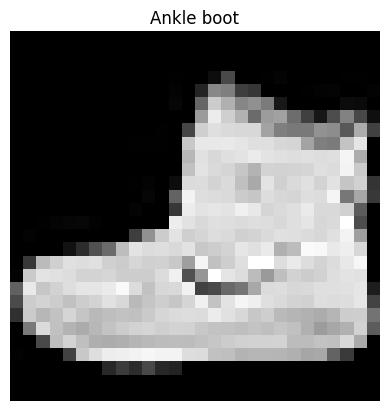

In [ ]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)

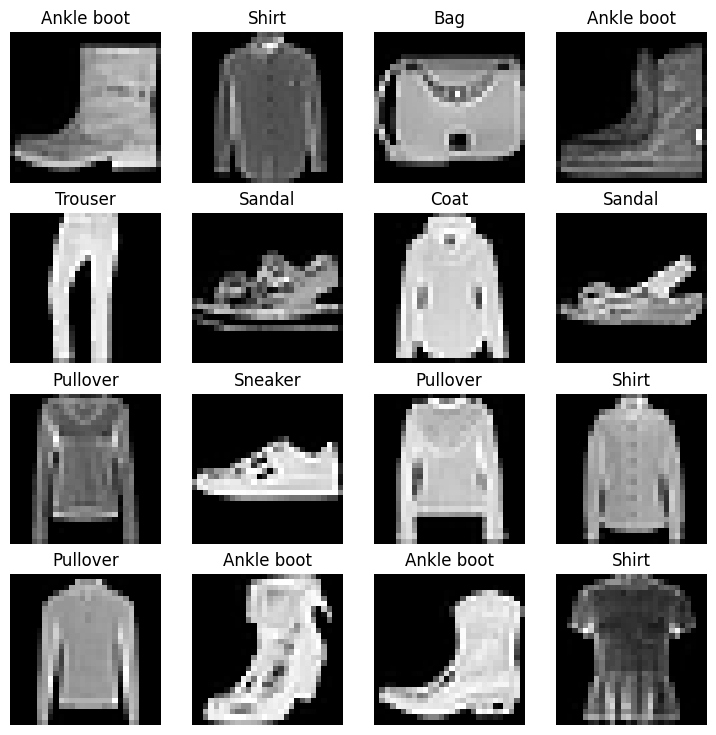

In [ ]:
# Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows * cols + 1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  img, label = train_data[random_idx]
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)



In [ ]:
## Prepare dataloader
## Data loader turns our dataset into python iterable
## More specifically we want to turn our data into batches because computer hardware may not be able look at 6000 images in one hit.So we break it down
## It gives our neural network more chances to update its gradients per epoch


In [ ]:
from torch.utils.data import DataLoader
## Setup the batch size hyperparameter
BATCH_SIZE = 32
## Turn datasets into iterable
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=32,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=32,
                             shuffle=False)

train_dataloader, test_dataloader


(<torch.utils.data.dataloader.DataLoader at 0x78bf202698d0>,
 <torch.utils.data.dataloader.DataLoader at 0x78bf224e5e70>)

In [ ]:
# Lets check out what we have created

print(f"Dataloader: {train_dataloader}\nLength: {len(train_dataloader)}\nType: {type(train_dataloader)}")

print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Dataloader: <torch.utils.data.dataloader.DataLoader object at 0x78bf202698d0>
Length: 1875
Type: <class 'torch.utils.data.dataloader.DataLoader'>
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


In [ ]:
## Show a sample
## check out whats inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_features_batch.shape




(torch.Size([32, 1, 28, 28]), torch.Size([32, 1, 28, 28]))

Image shape: torch.Size([1, 28, 28])
Image size:torch.Size([1, 28, 28])
Label:8, 8,label size:torch.Size([])


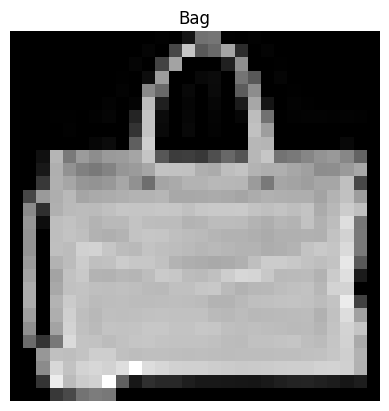

In [ ]:
#torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
print(f"Image shape: {img.shape}")
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image size:{img.shape}")
print(f"Label:{label}, {label},label size:{label.shape }")

## Model 0: Build a baseline model
## When starting to build a series of machine learning modelling experiments, its best practice to start with a baseline model
## A baseline model is a simple model that you will try and improve upon with subsequent models/ experiments

In [ ]:
## Create a faltten layer
flatten_model = nn.Flatten()

# Get a single sample
x= train_features_batch[0]

# Flatten the sample
output = flatten_model(x)

# Print out what happened
print(f"Shape before flattening: {x.shape}")  # color_channels, height, width
print(f"Shape after flattening: {output.shape}") # color_channels , height*width
#

Shape before flattening: torch.Size([1, 28, 28])
Shape after flattening: torch.Size([1, 784])


In [ ]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
  def __init__(self,
               input_shape:int,
               hidden_units:int,
               output_shape:int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape)
    )
  def forward(self, x):
    return self.layer_stack(x)

In [ ]:
torch.manual_seed(42)
#Setup model with input pararmeters
model_0 = FashionMNISTModelV0(input_shape=784,
                              hidden_units=10,
                              output_shape=len(class_names))

model_0
#

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [ ]:
dummy_x = torch.rand([1,1,28,28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

### Setup loss, optmizer and evaluation metrics
* loss function- since we are working with multi class data our fucntion will be nn.crossentropyloss()
* optimizer - our optmizer
* Evaluation metric- since we are working on a classfication lets use accuracy as our evaluation metric


In [ ]:
import requests
from pathlib import Path

# Download helper functions from learn pytorch repo
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

helper_functions.py already exists, skipping download


In [ ]:
# import accuracy metric
from helper_functions import accuracy_fn

In [ ]:
# Setup loss function and optmizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)


### Creating a function to time our experiments
* Two main things you 'll often want to track are
* Model performance( loss and accuracy values etc)
* How fast it runs

In [ ]:
from timeit import default_timer as timer
def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):
  """Prints difference between start and end time."""
  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time


In [ ]:
start_time = timer()
# Same code
end_time = timer()
print_train_time(start=start_time,
                 end=end_time,
                 device="cpu")

Train time on cpu: 0.000 seconds


5.347900003016548e-05

### Creating a training loop and training a model on batches of data
* Highlight that the optimizer will update a model's parameter once per batch rather than once per epoch
* Loop through epochs
* Loop through training batches, perform training steps, calculates the train loss per batch
* Loop through testing batches ,perform testing steps, calculate the test loss per batch
* Print out whats happening
* Time it all

In [ ]:
"""
This code snippet sets up the environment for training a PyTorch model and uses the tqdm library to display a progress bar during training.

from tqdm.auto import tqdm: Imports the tqdm library, which is used to create progress bars.
The auto module automatically detects the environment (e.g., Jupyter Notebook) and displays the appropriate progress bar.
epochs = 3: Sets the number of epochs for training. An epoch is one complete pass through the entire training dataset."""

# Import tqdm for progress bar

from tqdm.auto import tqdm

#Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the number of epochs
epochs = 10

# Create training and test loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-------")
  ### Training
  train_loss = 0

  # Loop through data batches
  for batch, (X, y) in enumerate(train_dataloader
                                  ):
    model_0.train()
    # 1. Forward pass
    y_logits = model_0(X)
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

    # 2. Calculate the loss
    loss = loss_fn(y_logits, y)
    train_loss += loss

    # 3.Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    # 6. Print out whats happening
    if batch % 400 == 0:
      print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

# Dividie total train loss by length of train dataloader
  train_loss /= len(train_dataloader)

  ### Testing
  test_loss, test_acc = 0, 0
  model_0.eval()
  with torch.inference_mode():
    for X_test, y_test in test_dataloader:
      # 1.Forward pass
      test_pred = model_0(X_test)
      # 2. Calculate loss (accumulatively)
      test_loss += loss_fn(test_pred, y_test)
      # 3. Calculate accuracy (accumulatively)
      test_acc += accuracy_fn(y_true=y_test,
                              y_pred=test_pred.argmax(dim=1))
    #calculate the test loss average per batch
    test_loss /= len(test_dataloader)
    #calculate the test accuracy average per batch
    test_acc /= len(test_dataloader)

   #Print out whats happening
  print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")

# Calculate training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                            end=train_time_end_on_cpu,
                                            device=str(next(model_0.parameters()).device))




  0%|          | 0/4 [00:00<?, ?it/s]

Epoch: 0
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 2.31847 | Test loss: 2.31906, Test acc: 10.85%

Epoch: 1
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 2.31847 | Test loss: 2.31906, Test acc: 10.85%

Epoch: 2
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 2.31847 | Test loss: 2.31906, Test acc: 10.85%

Epoch: 3
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 2.31847 | Test loss: 2.31906, Test acc: 10.85%

Train time on cpu: 42.871 seconds


In [ ]:
str(next(model_0.parameters()).device)

'cpu'

In [ ]:
# Model 1 :Building a better model with non-linerarity
# Model 1 :Building a better model with non-linerarity
# Create a model with non_linear and linear layers
import torch.nn as nn # Import the nn module
class FashionMNISTMODELVI(nn.Module):
  def __init__(self, input_shape:int, hidden_units:int, output_shape:int):
    super().__init__()
    self.layer_stack = nn.Sequential(
      nn.Flatten(),
      nn.Linear(in_features=input_shape,
                out_features=hidden_units),
      nn.ReLU(),
      nn.Linear(in_features=hidden_units,
                out_features=output_shape)
    )

  def forward(self, x: torch.Tensor):
    return self.layer_stack(x)
  super().__init__()
  self.layer_stack = nn.Sequential(
      nn.Flatten(),
      nn.Linear(in_features=input_shape,
                out_features=hidden_units),
      nn.ReLU(),
      nn.Linear(in_features=hidden_units,
                out_features=output_shape)
  )

  def forward(self, x: torch.Tensor):
    return self.layer_stack(x)

NameError: name 'torch' is not defined